In [2]:
import pandas as pd
import numpy as np
import glob
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r'C:\Users\kesav\Guvi\guvi main\c5\data'
all_files = glob.glob(path + "/*.csv")
dataframes = []
# Loop through the list of files and read each one into a DataFrame
for file in all_files:
    df_single= pd.read_csv(file)
    dataframes.append(df_single)
# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [4]:
df.head()

month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED                 1977        9000.0   
1            31.0        IMPROVED                 1977        6000.0   
2            31.0        IMPROVED                 1977        8000.0   
3            31.0        IMPROVED                 1977        6000.0   
4            73.0  NEW GENERATION                 1976       47200.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875168 entries, 0 to 875167
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                875168 non-null  object 
 1   town                 875168 non-null  object 
 2   flat_type            875168 non-null  object 
 3   block                875168 non-null  object 
 4   street_name          875168 non-null  object 
 5   storey_range         875168 non-null  object 
 6   floor_area_sqm       875168 non-null  float64
 7   flat_model           875168 non-null  object 
 8   lease_commence_date  875168 non-null  int64  
 9   resale_price         875168 non-null  float64
 10  remaining_lease      218321 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 73.4+ MB


In [5]:
df['month'] = pd.to_datetime(df['month'])

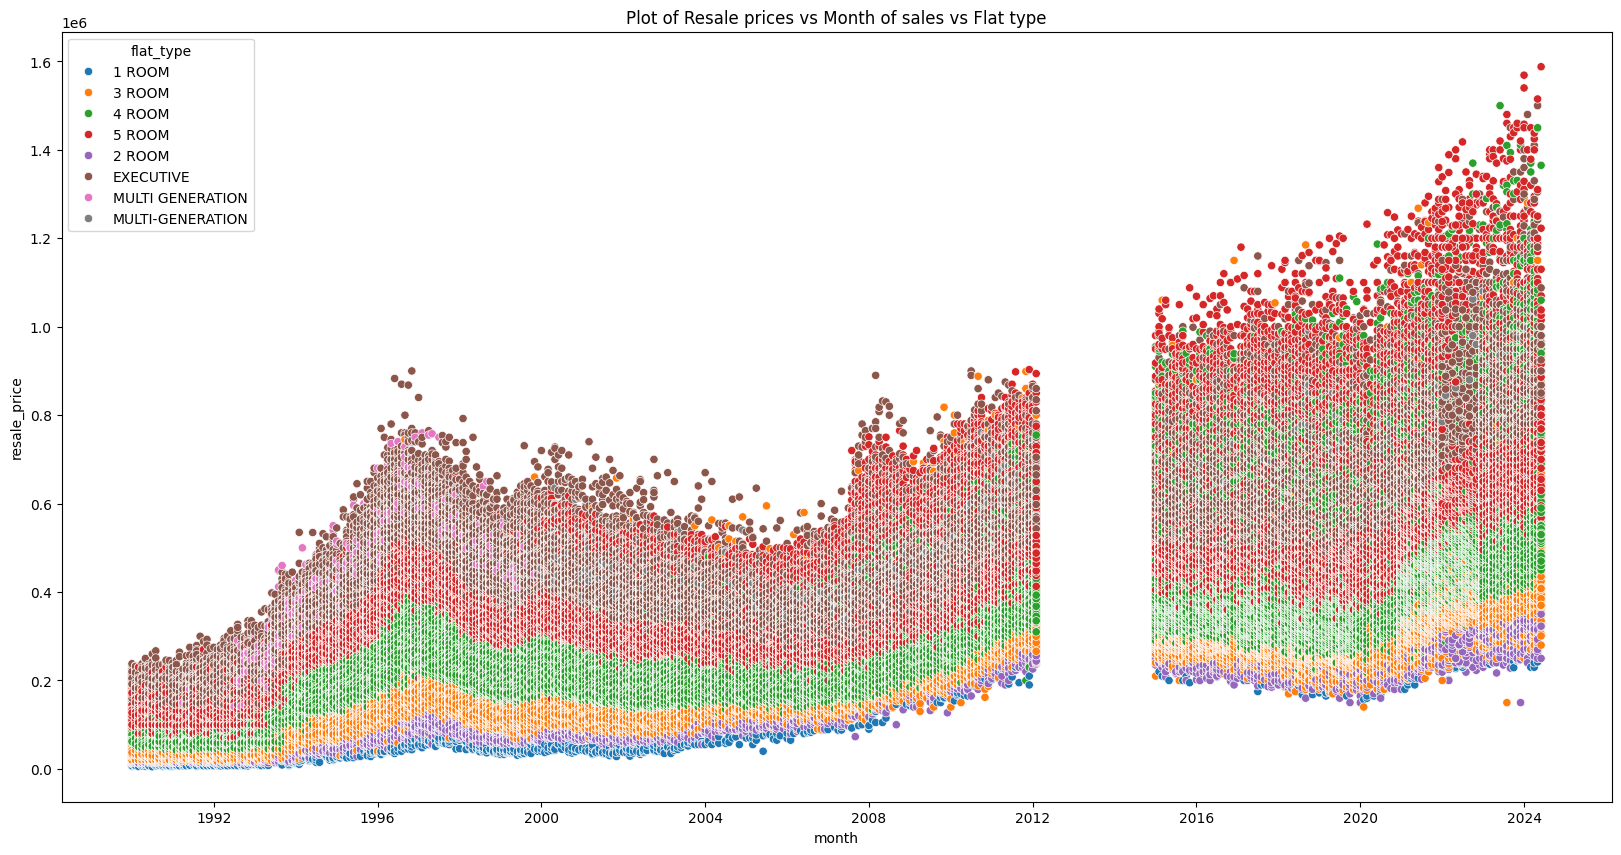

In [6]:
plt.figure(figsize=(20,10))
plt.title('Plot of Resale prices vs Month of sales vs Flat type')
sns.scatterplot(data=df, x='month', y='resale_price', hue='flat_type');

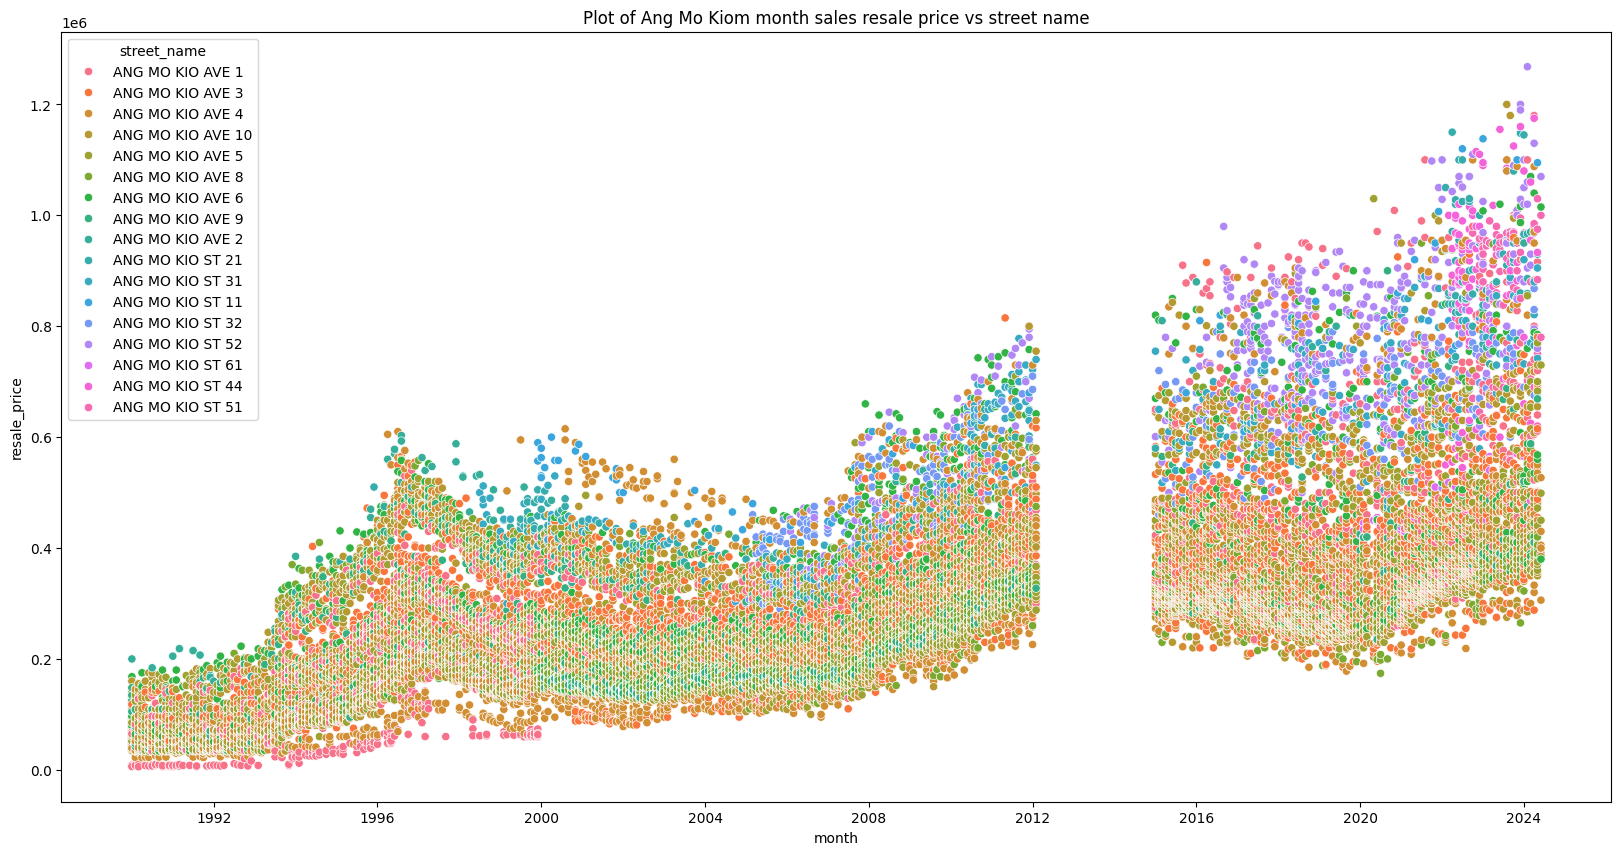

In [7]:
plt.figure(figsize=(20,10))
plt.title('Plot of Ang Mo Kiom month sales resale price vs street name')
sns.scatterplot(data=df[df['town'] == 'ANG MO KIO'], x='month', y='resale_price', hue='street_name');

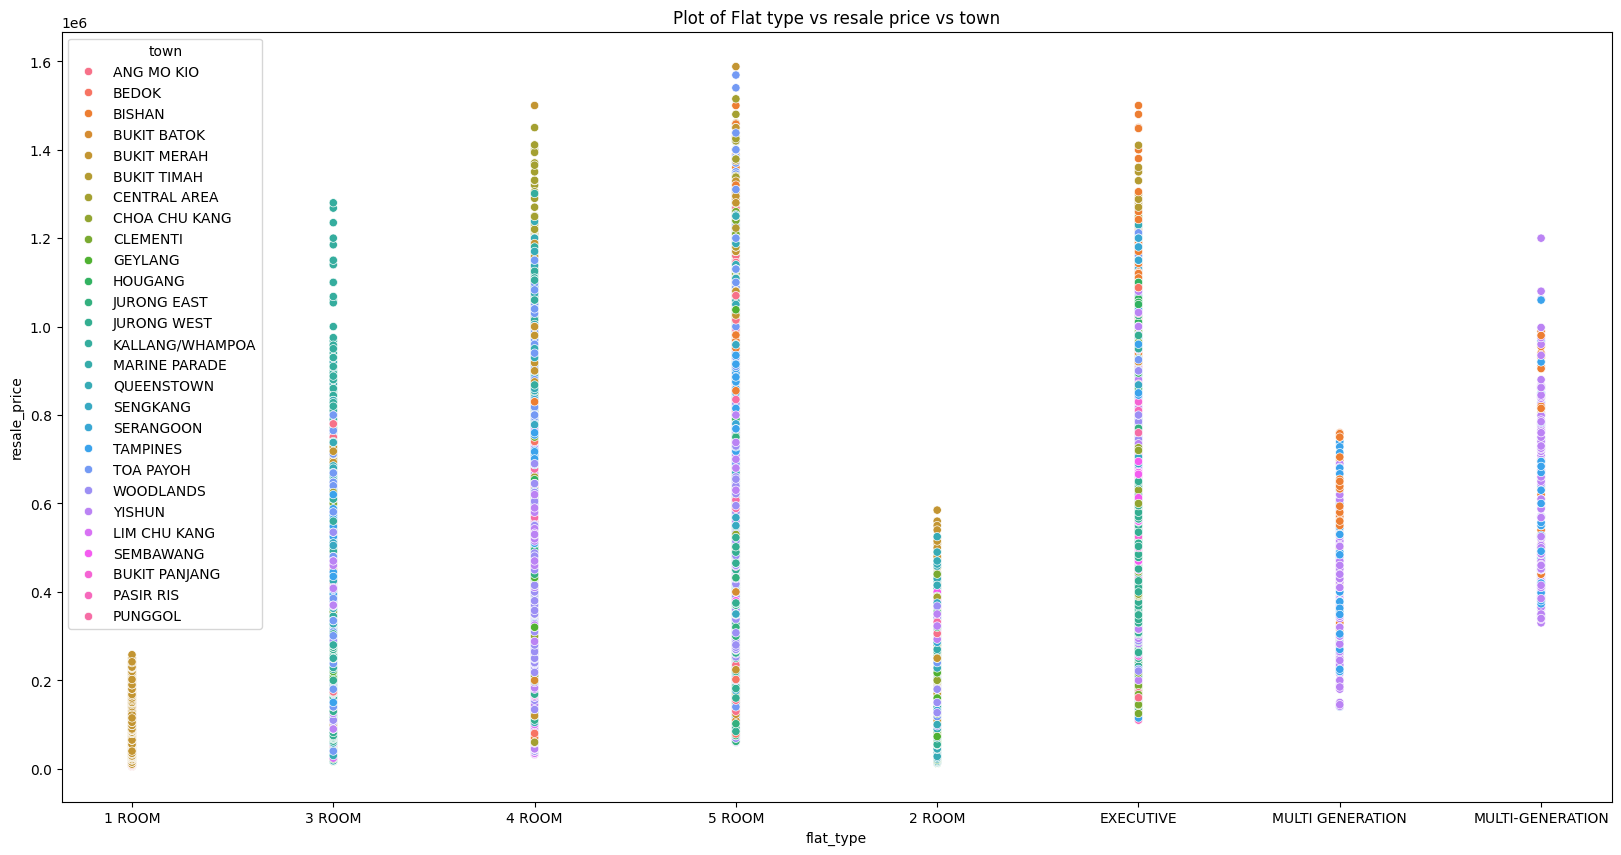

In [8]:
plt.figure(figsize=(20,10))
plt.title('Plot of Flat type vs resale price vs town')
sns.scatterplot(data=df, x='flat_type',y='resale_price', hue='town');

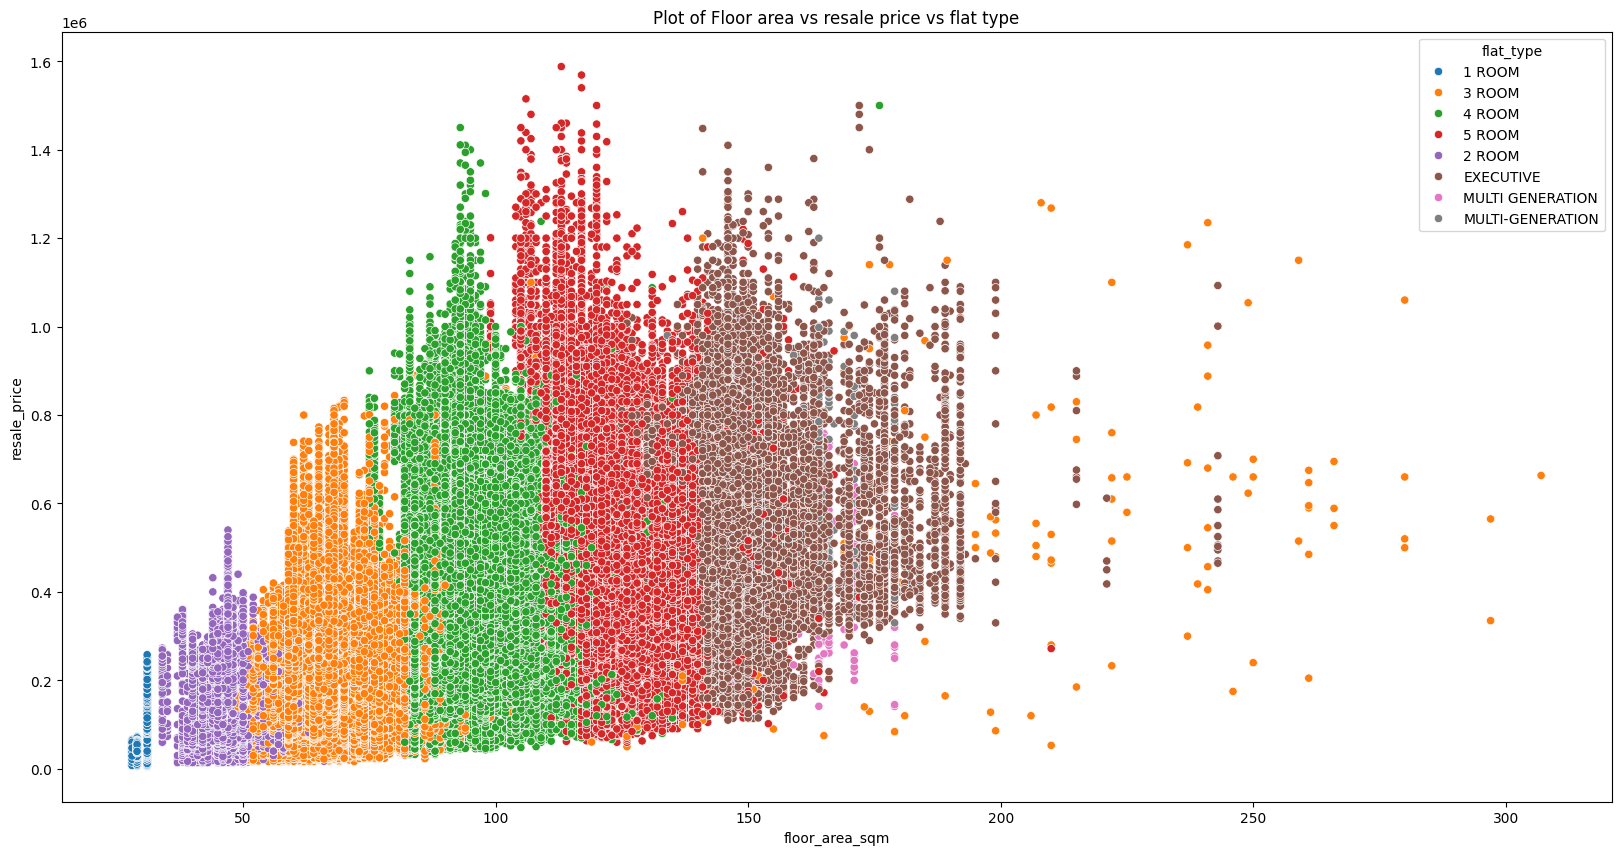

In [9]:
plt.figure(figsize=(20,10))
plt.title('Plot of Floor area vs resale price vs flat type')
sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', hue='flat_type');

In [6]:
df_1=df.copy()

In [11]:
df.isnull().sum(),df.shape

(month                       0
 town                        0
 flat_type                   0
 block                       0
 street_name                 0
 storey_range                0
 floor_area_sqm              0
 flat_model                  0
 lease_commence_date         0
 resale_price                0
 remaining_lease        656847
 dtype: int64,
 (875168, 11))

In [7]:
df_1.drop(columns=['remaining_lease'], inplace=True)

In [13]:
from sklearn.preprocessing import OrdinalEncoder
df_1['flat_type'] = OrdinalEncoder().fit_transform(df_1[['flat_type']])
df_1['town'] = OrdinalEncoder().fit_transform(df_1[['town']])
df_1['street_name'] = OrdinalEncoder().fit_transform(df_1[['street_name']])
df_1['block'] = OrdinalEncoder().fit_transform(df_1[['block']])
df_1['storey_range']=OrdinalEncoder().fit_transform(df_1[['storey_range']])
df_1['flat_model'] = OrdinalEncoder().fit_transform(df_1[['flat_model']])

<Axes: title={'center': 'Correlation Heatmap'}>

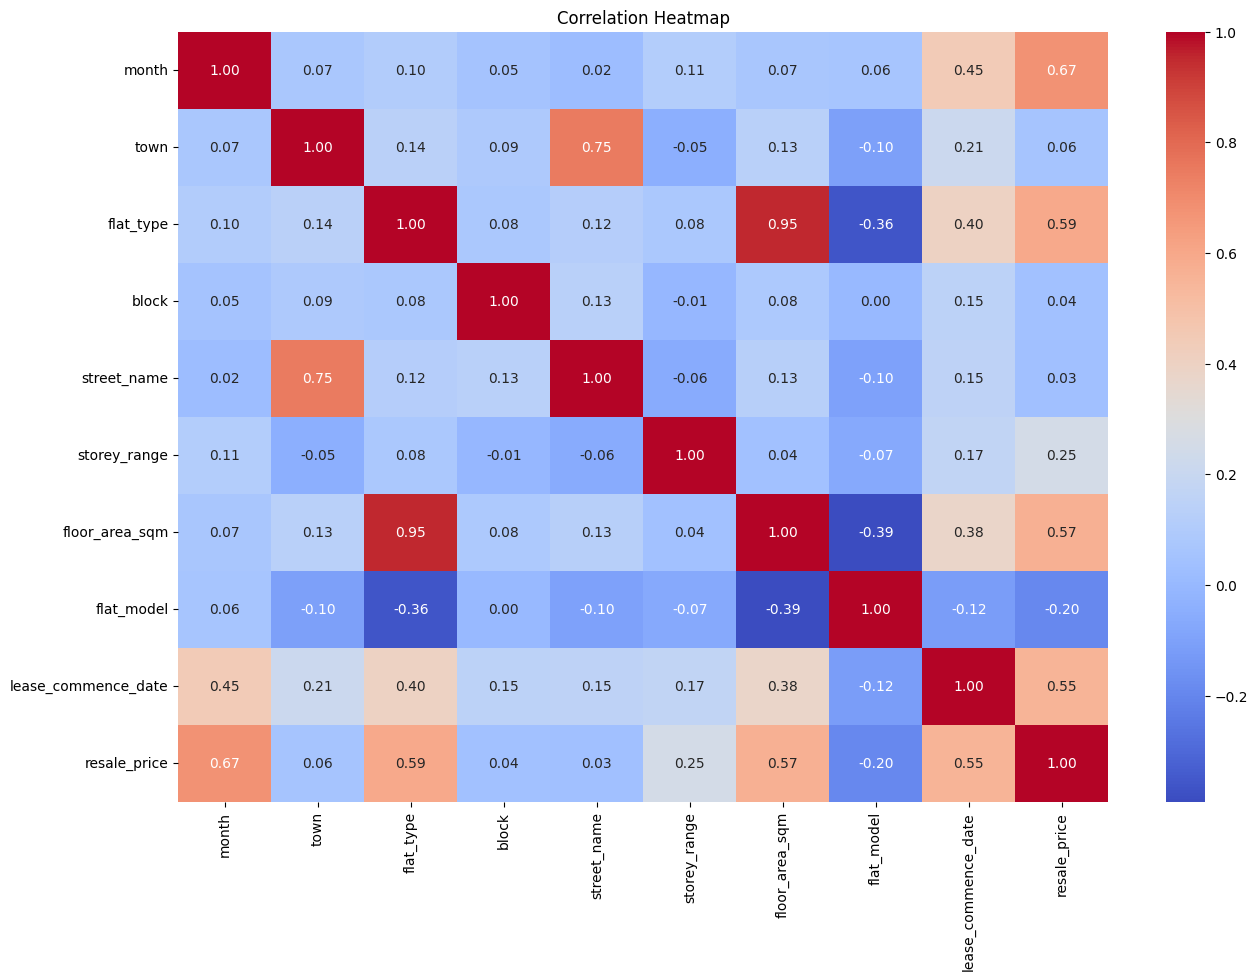

In [14]:
plt.figure(figsize=(15, 10))
plt.title('Correlation Heatmap')
sns.heatmap(df_1.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Key findings based on the relationship on correlation heatmap and various scatter plots to select the model feature:
1.Street name and block has very weak correlation with the resale price so we are not considering these two columns for model features.
2.Month flat type floor area lease commencement date these columns has very high correlation with the resale price value so this features are considered as important features.

In [8]:
df_2=df.copy()

In [9]:
df_2.drop(columns=['remaining_lease', 'block', 'street_name'], inplace=True)

In [10]:
for i in ['town', 'flat_type', 'storey_range',
       'flat_model']:
    u_values=len(df_2[i].unique())
    print(f'unique value of {i}:{u_values}')

unique value of town:27
unique value of flat_type:8
unique value of storey_range:17
unique value of flat_model:34


In [11]:
def plot(df, column):
    plt.figure(figsize=(10, 10))
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

In [12]:
df_2.columns

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

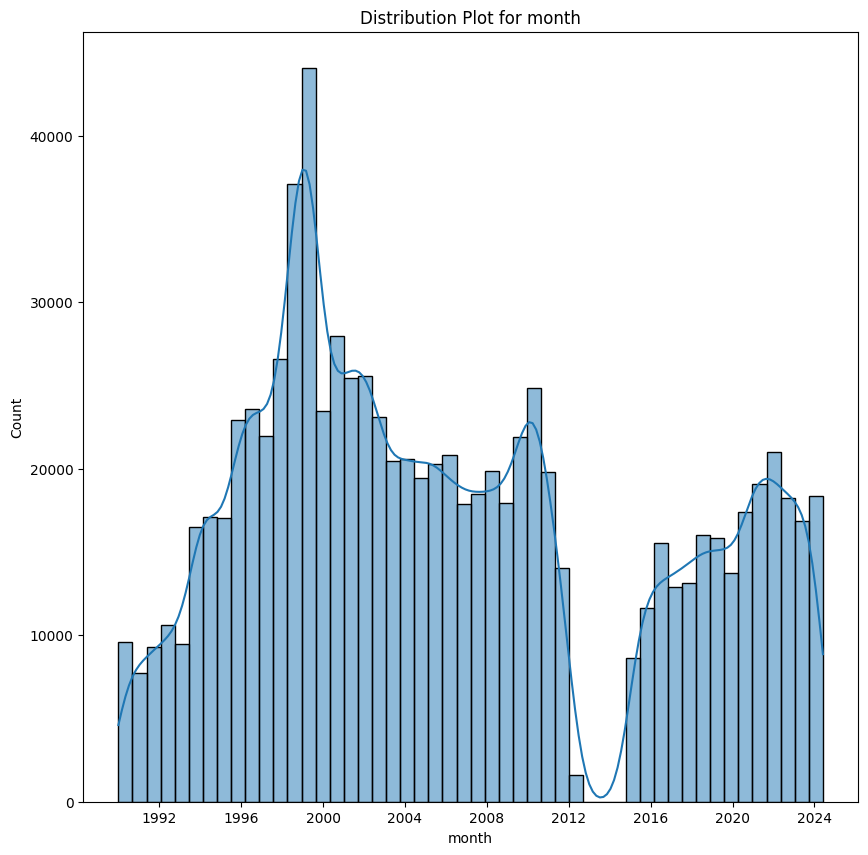

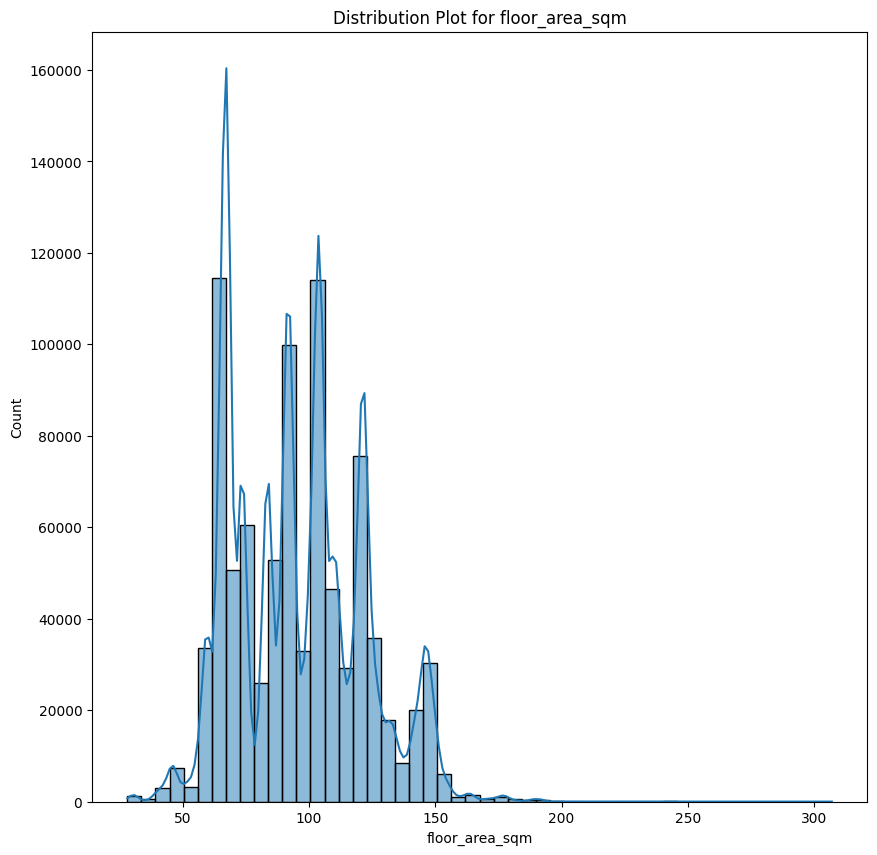

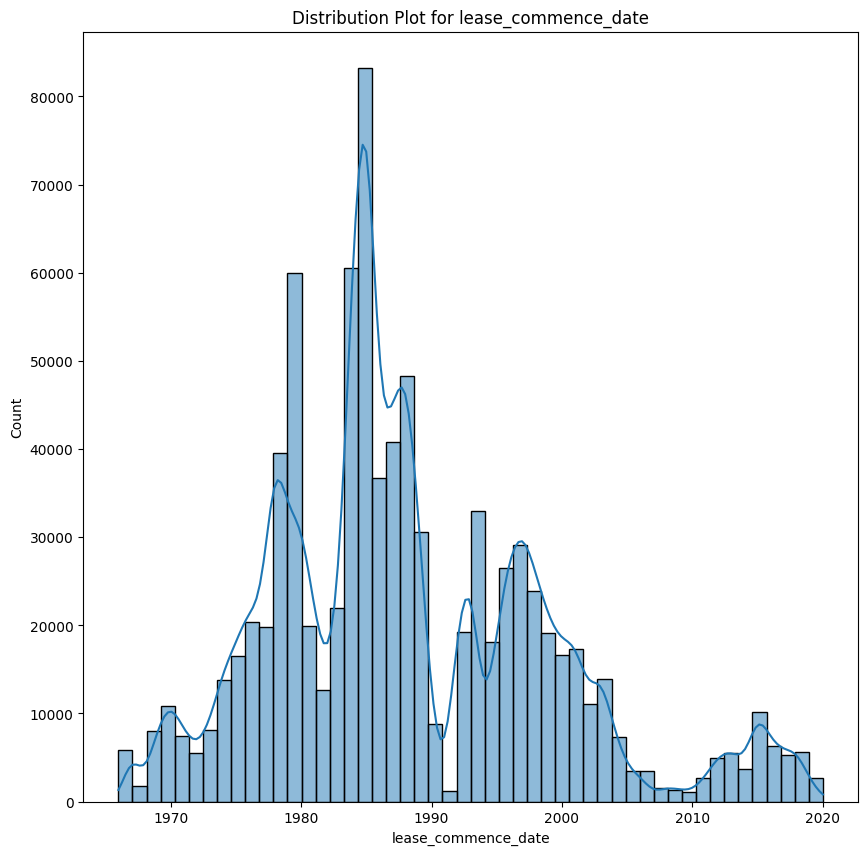

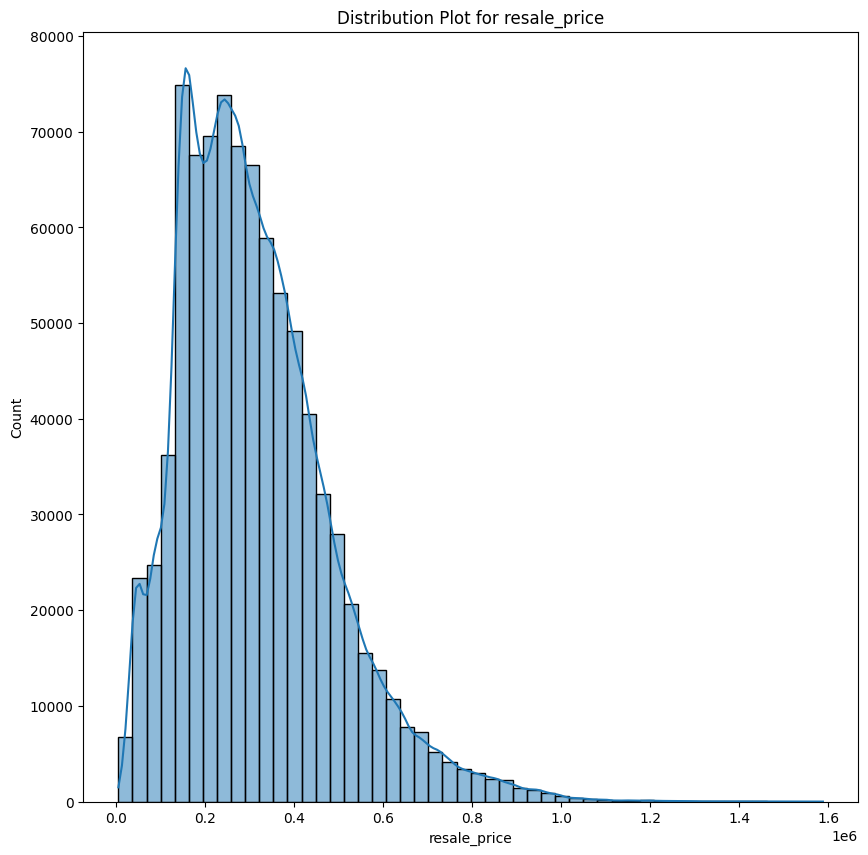

In [42]:
for i in ['month', 'floor_area_sqm','lease_commence_date', 'resale_price']:
    plot(df_2, i)

In [13]:
for i in ['town', 'flat_type', 'storey_range',
       'flat_model']:
    u_values=len(df_2[i].unique())
    print(f'unique value of {i}:{u_values}')

unique value of town:27
unique value of flat_type:8
unique value of storey_range:17
unique value of flat_model:34


In [14]:
flat_model = {
    'IMPROVED': 'Normal',
    'NEW GENERATION': '3GEN',
    'MODEL A': 'MODEL A',
    'STANDARD': 'Normal',
    'SIMPLIFIED': 'Normal',
    'MODEL A-MAISONETTE': 'Duplexes',
    'APARTMENT': 'APARTMENT',
    'MAISONETTE': 'Duplexes',
    'TERRACE': 'TERRACE',
    '2-ROOM': '2-ROOM',
    'IMPROVED-MAISONETTE': 'Duplexes',
    'MULTI GENERATION': '3GEN',
    'PREMIUM APARTMENT': 'APARTMENT',
    'Improved': 'Normal',
    'New Generation': '3GEN',
    'Model A': 'MODEL A',
    'Standard': 'Normal',
    'Apartment': 'APARTMENT',
    'Simplified': 'Normal',
    'Model A-Maisonette': 'Duplexes',
    'Maisonette': 'Duplexes',
    'Multi Generation': '3GEN',
    'Adjoined flat': 'APARTMENT',
    'Premium Apartment': 'APARTMENT',
    'Terrace': 'TERRACE',
    'Improved-Maisonette': 'Duplexes',
    'Premium Maisonette': 'Duplexes',
    '2-room': '2-ROOM',
    'Model A2': 'MODEL A2',
    'Type S1': 'TYPE S1',
    'Type S2': 'TYPE S2',
    'DBSS': 'Normal',
    'Premium Apartment Loft': 'APARTMENT',
    '3Gen': '3GEN'
}
df_2['flat_model'] = df_2['flat_model'].map(flat_model)

In [15]:
flat_model_code={'Normal':1, '3GEN':2, 'MODEL A':3, 'Duplexes':4, 'APARTMENT':5, 'TERRACE':6,
       '2-ROOM':7, 'MODEL A2':8, 'TYPE S1':9, 'TYPE S2':10}
df_2['flat_model'] = df_2['flat_model'].map(flat_model_code)

In [16]:
df_2.rename(columns={'flat_type': 'bed_rooms'}, inplace=True)

In [17]:
bed_room_type={'1 ROOM':1, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, '2 ROOM':2, 'EXECUTIVE':3,
        'MULTI GENERATION':4, 'MULTI-GENERATION':4}
df_2['bed_rooms'] = df_2['bed_rooms'].map(bed_room_type)

In [18]:
storey_range_code={'10 TO 12':4, '04 TO 06':2, '07 TO 09':3, '01 TO 03':1, '13 TO 15':5,
       '19 TO 21':7, '16 TO 18':6, '25 TO 27':9, '22 TO 24':8, '28 TO 30':10,
       '31 TO 33':11, '40 TO 42':14, '37 TO 39':13, '34 TO 36':12, '46 TO 48':16,
       '43 TO 45':15, '49 TO 51':17}
df_2['storey_range']=df_2['storey_range'].map(storey_range_code)

In [19]:
town_code={'ANG MO KIO':1, 'BEDOK':2, 'BISHAN':3, 'BUKIT BATOK':4, 'BUKIT MERAH':5,
       'BUKIT TIMAH':6, 'CENTRAL AREA':7, 'CHOA CHU KANG':8, 'CLEMENTI':9,
       'GEYLANG':10, 'HOUGANG':11, 'JURONG EAST':12, 'JURONG WEST':13,
       'KALLANG/WHAMPOA':14, 'MARINE PARADE':15, 'QUEENSTOWN':16, 'SENGKANG':17,
       'SERANGOON':18, 'TAMPINES':19, 'TOA PAYOH':20, 'WOODLANDS':21, 'YISHUN':22,
       'LIM CHU KANG':23, 'SEMBAWANG':24, 'BUKIT PANJANG':25, 'PASIR RIS':26,
       'PUNGGOL':27}
df_2['town']=df_2['town'].map(town_code)

In [20]:
df_2['Available_year'] = df_2['month'].dt.year

In [21]:
df_2=df_2.drop(['month'],axis=1)

In [22]:
df_2.isnull().sum()

town                   0
bed_rooms              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
Available_year         0
dtype: int64

In [23]:
cols = list(df_2.columns)
cols.remove('resale_price')
cols.append('resale_price')
df_2 = df_2[cols]

findind suitable model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
models = {'LinearRegression':LinearRegression(),
        'Ridge' : Ridge(),
         'Lasso': Lasso(),
         'ElasticNet': ElasticNet(),
         'KNeighborsRegressor': KNeighborsRegressor(),
         'DecisionTreeRegressor': DecisionTreeRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor()}

In [56]:
def model_fit_1(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_metrics = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = model.score(X_test, y_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        m=y_test.mean()
        error_percent=(mae/m)*100
        
        model_metrics[name] = {'MSE': mse, 'MAE': mae,'Error_percent':error_percent ,'R2': r2,'Accuracy':accuracy}

    model_metrics_df = pd.DataFrame(model_metrics).transpose().sort_values('Accuracy')

    return model_metrics_df

In [62]:
df_sample = df_2.sample(frac=0.1, random_state=42)
X = df_sample.drop('resale_price', axis=1)
y = df_sample['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

test1

In [63]:
model_finder = model_fit_1(models, X_train, X_test, y_train, y_test) # type: ignore
model_finder

MSE           MAE  Error_percent  \
ElasticNet                 6.731554e+09  60534.256259      19.422026   
Lasso                      6.698281e+09  60624.296627      19.450914   
Ridge                      6.698279e+09  60624.326986      19.450924   
LinearRegression           6.698279e+09  60624.335734      19.450927   
GradientBoostingRegressor  2.308362e+09  32728.736287      10.500804   
KNeighborsRegressor        2.115530e+09  29325.521969       9.408905   
DecisionTreeRegressor      2.022224e+09  28365.487912       9.100884   
RandomForestRegressor      1.207879e+09  22849.069742       7.330977   

                                 R2  Accuracy  
ElasticNet                 0.763793  0.763793  
Lasso                      0.764961  0.764961  
Ridge                      0.764961  0.764961  
LinearRegression           0.764961  0.764961  
GradientBoostingRegressor  0.919001  0.919001  
KNeighborsRegressor        0.925767  0.925767  
DecisionTreeRegressor      0.929041  0.929041  
RandomForestRegressor      0.957616  0.957616

In [64]:
df_sample = df_2.sample(frac=0.3, random_state=42)
X = df_sample.drop('resale_price', axis=1)
y = df_sample['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_finder = model_fit_1(models, X_train, X_test, y_train, y_test) # type: ignore
model_finder

MSE           MAE  Error_percent  \
ElasticNet                 6.654868e+09  60015.977882      19.265460   
LinearRegression           6.620471e+09  60052.008827      19.277026   
Ridge                      6.620471e+09  60052.006569      19.277026   
Lasso                      6.620469e+09  60051.977716      19.277016   
GradientBoostingRegressor  2.288284e+09  32505.289219      10.434377   
KNeighborsRegressor        1.474344e+09  24399.244223       7.832292   
DecisionTreeRegressor      1.392637e+09  24018.133857       7.709954   
RandomForestRegressor      9.000585e+08  20272.235739       6.507500   

                                 R2  Accuracy  
ElasticNet                 0.765737  0.765737  
LinearRegression           0.766947  0.766947  
Ridge                      0.766947  0.766947  
Lasso                      0.766948  0.766948  
GradientBoostingRegressor  0.919448  0.919448  
KNeighborsRegressor        0.948100  0.948100  
DecisionTreeRegressor      0.950977  0.950977  
RandomForestRegressor      0.968316  0.968316

In [65]:
df_sample = df_2.sample(frac=0.7, random_state=42)
X = df_sample.drop('resale_price', axis=1)
y = df_sample['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_finder = model_fit_1(models, X_train, X_test, y_train, y_test) # type: ignore
model_finder

MSE           MAE  Error_percent  \
ElasticNet                 6.763620e+09  60417.517916      19.336096   
Lasso                      6.723133e+09  60452.134690      19.347174   
Ridge                      6.723131e+09  60452.151974      19.347180   
LinearRegression           6.723131e+09  60452.152653      19.347180   
GradientBoostingRegressor  2.349043e+09  32736.116382      10.476906   
KNeighborsRegressor        1.177530e+09  22011.363693       7.044544   
DecisionTreeRegressor      1.090421e+09  21616.759689       6.918254   
RandomForestRegressor      7.713791e+08  19025.377999       6.088905   

                                 R2  Accuracy  
ElasticNet                 0.763939  0.763939  
Lasso                      0.765352  0.765352  
Ridge                      0.765352  0.765352  
LinearRegression           0.765352  0.765352  
GradientBoostingRegressor  0.918015  0.918015  
KNeighborsRegressor        0.958902  0.958902  
DecisionTreeRegressor      0.961943  0.961943  
RandomForestRegressor      0.973078  0.973078

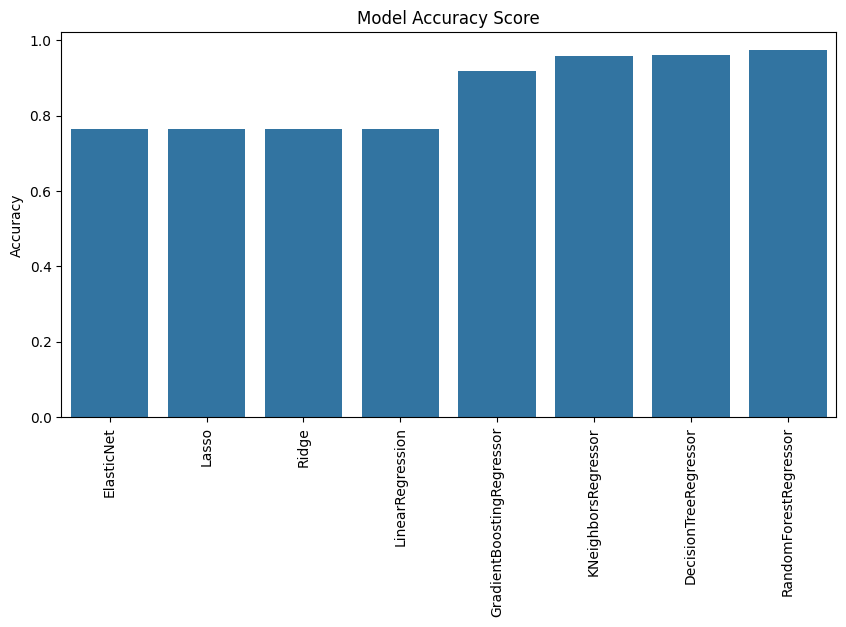

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(data=model_finder['Accuracy'].T)
plt.title('Model Accuracy Score')
plt.xticks(rotation=90);

Hyperparameter Tuning :Random Search

In [67]:
model = RandomForestRegressor()

# Print the default parameters
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'min_samples_split': randint(1, 4),
    'min_samples_leaf': randint(1, 4),
    
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=0)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Best parameters
print(random_search.best_params_)

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 174}


In [26]:
X = df_2.drop('resale_price', axis=1)
y = df_2['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
parameters = {
    "n_estimators": 174,
    "min_samples_split": 2,
    'min_samples_leaf':2,
    "random_state": 42,
}

regressor =RandomForestRegressor(**parameters) # type: ignore
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
m=df_2['resale_price'].mean()
error_percent=(mae/m)*100
model_metrics_f = {'MAE': mae,'Error_percent':error_percent ,'R2': r2,'Accuracy':accuracy}
model_metrics_table = pd.DataFrame(model_metrics_f,index=[0])
model_metrics_table

MAE  Error_percent        R2  Accuracy
0  18219.367556       5.831296  0.975447  0.975447

In [28]:
import pickle

In [29]:
with open('model_rfr.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [40]:
X_test.describe().T

count         mean        std     min     25%     50%  \
town                 262551.0    13.638162   7.801669     1.0     8.0    13.0   
bed_rooms            262551.0     3.785070   0.789687     1.0     3.0     4.0   
storey_range         262551.0     2.898050   1.605532     1.0     2.0     3.0   
floor_area_sqm       262551.0    95.707332  25.872382    28.0    73.0    93.0   
flat_model           262551.0     2.320292   1.388774     1.0     1.0     2.0   
lease_commence_date  262551.0  1988.209834  10.691930  1966.0  1981.0  1986.0   
Available_year       262551.0  2005.776710   9.440423  1990.0  1998.0  2004.0   

                        75%     max  
town                   20.0    27.0  
bed_rooms               4.0     5.0  
storey_range            4.0    17.0  
floor_area_sqm        113.0   259.0  
flat_model              3.0    10.0  
lease_commence_date  1996.0  2020.0  
Available_year       2012.0  2024.0

In [31]:
X_test.head()

town  bed_rooms  storey_range  floor_area_sqm  flat_model  \
840294    25          4             8            93.0           5   
138544     5          4             1            84.0           1   
327737     1          3             3            73.0           2   
600431    13          3             2            67.0           2   
816074    25          4             4            93.0           5   

        lease_commence_date  Available_year  
840294                 2003            2023  
138544                 1986            1996  
327737                 1976            2001  
600431                 1985            2010  
816074                 2015            2022

In [41]:
y_test.head()

840294    675000.0
138544    270000.0
327737    143000.0
600431    220000.0
816074    530000.0
Name: resale_price, dtype: float64

In [32]:
X_test.columns

Index(['town', 'bed_rooms', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'Available_year'],
      dtype='object')

In [33]:
town=25
bed_rooms=4
storey_range=8
floor_area_sqm=93
flat_model=5
lease_commence_date=2003
Available_year=2023
input_dic={'town':[town], 'bed_rooms':[bed_rooms], 'storey_range':[storey_range], 'floor_area_sqm':[floor_area_sqm], 
           'flat_model':[flat_model],'lease_commence_date':[lease_commence_date], 'Available_year':[Available_year]}
x_input=pd.DataFrame(input_dic)

In [34]:
y_st = regressor.predict(x_input)

In [35]:
y_st

array([649486.4582193])

In [38]:
y_test.head(2)

840294    675000.0
138544    270000.0
Name: resale_price, dtype: float64